## Custom Cross_Entropy Losses

Tests with PyTorch

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Generate dummy dataset
batch_size, n_classes = 5, 3
x = torch.randn(batch_size, n_classes)

# Generate dummy labels
target = torch.randint(n_classes, size=(batch_size,), dtype=torch.long)

In [22]:
x, target

(tensor([[ 0.2934,  0.1837, -0.7830],
         [ 1.3234, -0.1950,  0.2638],
         [ 0.0298, -1.4776, -0.0341],
         [-1.9384, -0.3713, -0.9684],
         [ 1.8053,  0.5740, -0.9478]]),
 tensor([2, 1, 1, 1, 1]))

In [18]:
# Base Cross-Entropy
F.cross_entropy(x, target)

tensor(1.6452)

In [19]:
# Built CE
# It's just a combination of LogSoftMax and NLLLoss in one single "module"

def log_softmax(x):
    return x - x.exp().sum(-1).log().unsqueeze(-1)

def nll(inp, target):
    return -inp[range(target.shape[0]), target].mean()

nll(log_softmax(x), target)

tensor(1.6452)

In [20]:
# Cross-Entropy class

class myCELoss(nn.Module):
    def __init__(self, class_weights):
        super().__init__()
        self.class_weights = torch.autograd.Variable(torch.FloatTensor(class_weights))
        
    def forward(self, logits, target):
        log_probabilites = log_softmax(logits)
        # NLLLoss(x, class) = -weights[class] * x[class]
        return (-self.class_weights.index_select(0, target) * log_probabilites.index_select(-1, target).diag()).mean()

ce = myCELoss([1.0, 1.0, 1.0])
ce(x, target)

tensor(1.6452)

In [21]:
def my_cross_entropy(x, y):
    log_prob = -1.0 * F.log_softmax(x, 1)
    loss = log_prob.gather(1, y.unsqueeze(1))
    loss = loss.mean()
    return loss

criterion = nn.CrossEntropyLoss()

batch_size = 5
nb_classes = 10
# x = torch.randn(batch_size, nb_classes, requires_grad=True)
# y = torch.randint(0, nb_classes, (batch_size,))
y = target

loss_reference = criterion(x, y)
loss = my_cross_entropy(x, y)

print(f'Torch CE: {loss_reference:.4f}')
print(f'My CE: {loss:.4f}')

Torch CE: 1.6452
My CE: 1.6452


In [14]:
t = torch.tensor([0, 1, 1, 0], dtype=float)
torch.mean(t)

tensor(0.5000, dtype=torch.float64)

## Understanding CELoss

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    """
    Hypothesis function - sigmoid
    """
    return 1.0 / (1.0 + np.exp(-z))

def cross_entropy_loss(yHat, y):
    """
    Cross-entropy loss function
        yHat is the predicted probability for the label
        y is the actual label
    """
    if y == 1:
        return -np.log(yHat)
    else:
        return -np.log(1 - yHat)


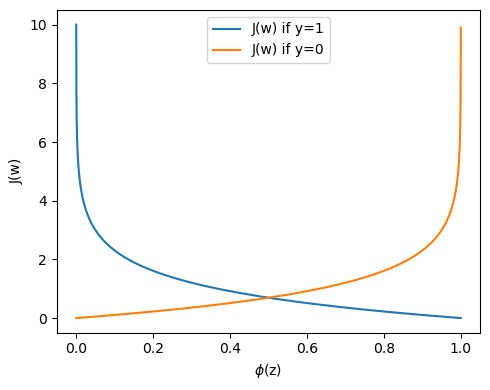

In [7]:
# Calculate sample values for Z
z = np.arange(-10, 10, 0.1)
h_z = sigmoid(z)

cost_1 = cross_entropy_loss(h_z, 1)
cost_0 = cross_entropy_loss(h_z, 0)

fig, ax = plt.subplots(figsize=(5, 4))
plt.plot(h_z, cost_1, label='J(w) if y=1')
plt.plot(h_z, cost_0, label='J(w) if y=0')
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

For y=1, if predicted probability is near 1, the loss function (J(w)) is close to 0, otherwise close to infinity.

For y=0, if predicted probability is near 0, the loss function is close to 0, otherwise close to infinity